In [4]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from matplotlib import animation
from IPython.display import HTML
%matplotlib notebook
#plt.switch_backend('TkAgg')
#plt.get_backend()

<IPython.core.display.Javascript object>


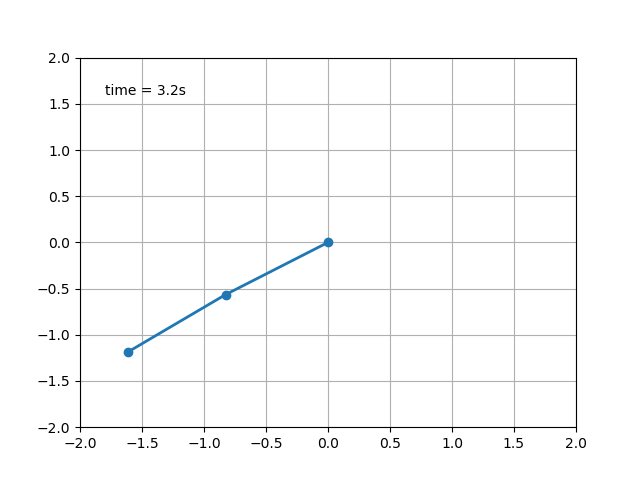

In [5]:
"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c



G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

HTML(ani.to_html5_video())


In [2]:
 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection
from random import *

# UNCOMMENT THE LINE BELOW FOR THE BACKEND YOU WANT TO TRY, THEN RESTART THE KERNEL AND EXECUTE THIS INPUT CELL
# If you leave all of the lines commented, the default backend will be used depending on your operating system

#plt.switch_backend('qt4agg')
plt.switch_backend('tkagg')
#plt.switch_backend('nbagg')
#%matplotlib inline


nx = 20     # x size of lattice
ny = 20     # y size of lattice

pAds = 0.01     # adsorption probability per time step
pDes = 0.0075   # desorption probability per time step

tMax = 50     # number of time steps

surface = np.zeros((nx,ny))              # create surface
xc = [0]
yc = [0]


# initialization and time step of simulation

patches = []

def init():
    global patches
    if patches:
        # prevent the second call of the init()
        return patches
    # initialize an empty list of circles
    for x in range(nx):
        for y in range(ny):
            if(surface[x][y] == 0):
                patches.append(ax_surf.add_patch(plt.Circle((x+0.5,y+0.5),0.45,color='w')))
    lines, = ax_covr.plot([],[])
    patches.append(lines)
    return patches

def animate(i): 
    global patches
    idx = 0
    for x in range(nx):
        for y in range(ny):
            if surface[x][y] == 0:
                if random() < pAds:
                    surface[x][y] = 1
                    patches[idx] = ax_surf.add_patch(plt.Circle((x+0.5,y+0.5),0.45,color='b'))
            else:
                if(random()<pDes):
                    surface[x][y] = 0
                    patches[idx] = ax_surf.add_patch(plt.Circle((x+0.5,y+0.5),0.45,color='w'))
            idx += 1
    coverage = np.sum(surface)/(nx*ny)
    xc.append(i)
    yc.append(coverage)
    lines, = ax_covr.plot(xc,yc,'ro',ms=2,lw=0)
    patches[idx] = lines
    return patches

# set up figure and animate

fig = plt.figure()
ax_surf = plt.subplot2grid((1, 2), (0, 0))
ax_covr = plt.subplot2grid((1, 2), (0, 1))
ax_surf.set_xlim(0,nx)
ax_surf.set_ylim(0,ny)
ax_covr.set_xlim(0,tMax)
ax_covr.set_ylim(0,1)

ax_surf.set_aspect(1)
ax_surf.axis('off')

ax_covr.set_aspect(tMax)


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=tMax, interval=0, blit=True,repeat=False)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'hold'

<IPython.core.display.Javascript object>


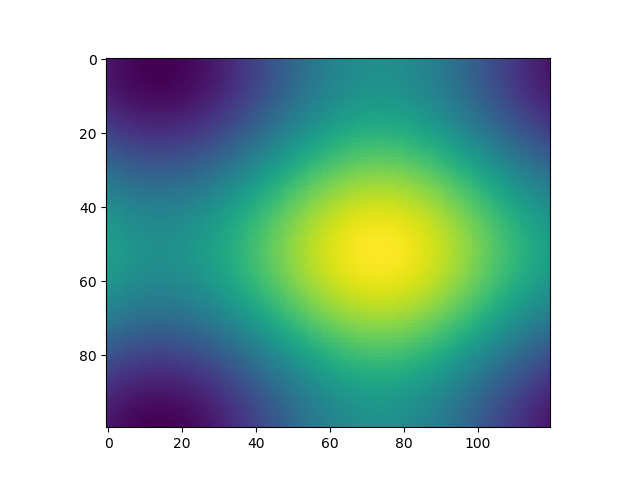

In [11]:
fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

<IPython.core.display.Javascript object>


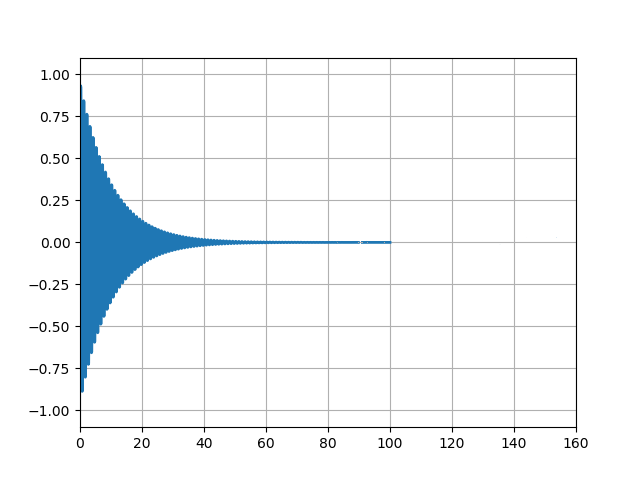

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
from IPython.display import HTML

def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()